In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#numpy.ndarray
X, y = df_train.iloc[:,1:].values, df_train.iloc[:,0].values

In [4]:
X.shape,y.shape

((42000, 784), (42000,))

In [5]:
type(y)

numpy.ndarray

In [6]:
# Xの33238番目のデータをtest_numberへ切り出す
test_number = X[33238]
 
# reshape関数を使って784を28x28へ変換する
test_number_image = test_number.reshape((28,28))
 
# pandasのカラム表示の設定を変更
pd.options.display.max_columns = 28
 
# Numpy配列からPandasのデータフレームへ変換
number_matrix = pd.DataFrame(test_number_image)
 
# number_matrixの表示
number_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,89,113,113,192,113,25,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,29,215,252,252,253,252,199,28,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,32,198,215,239,195,195,222,252,252,199,25,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,19,215,253,242,96,0,0,38,209,246,252,205,16,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,29,252,253,167,0,0,0,0,0,197,252,252,140,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,170,253,255,106,0,0,0,0,0,135,253,253,192,12,0,0,0,0,0,0,0


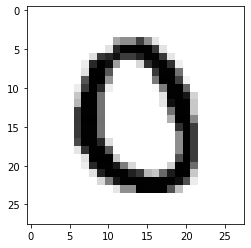

In [7]:
# imshowを使って表示test_number_image（Numpy配列）を画像で表示
%matplotlib inline 
plt.imshow(test_number_image, cmap = matplotlib.cm.binary,interpolation='nearest')
plt.show()

In [8]:
y[33238]

0

In [9]:
# 訓練データとテストデータを切り分ける
X_train, X_test, y_train, y_test = X[:35000], X[35000:], y[:35000], y[35000:]
y_test_backup = y_test
 
# 両方のサイズを確認
print(X_train.shape)
print(X_test.shape)

(35000, 784)
(7000, 784)


In [10]:
# 28x28x1のサイズへ変換しましょう
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
type(X_train)

numpy.ndarray

In [11]:
# 両方のサイズを再度確認
print(X_train.shape)
print(X_test.shape)

(35000, 28, 28, 1)
(7000, 28, 28, 1)


In [12]:
# データタイプをfloat32へ変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
X_train /= 255
X_test /= 255

In [14]:
from tensorflow.keras import utils
# ターゲットとなるyを変換 one_hot_vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
# y_testの1を表示
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
model = Sequential()

In [16]:
# 先に作成したmodelへレイヤーを追加
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [25]:
# 注意 - 10〜15分程度かかります
# モデルの訓練（エポック １０）
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1094/1094 [==============================] - 20s 17ms/step - loss: 0.6289 - accuracy: 0.8250
Epoch 2/10
1094/1094 [==============================] - 19s 17ms/step - loss: 0.3013 - accuracy: 0.9083
Epoch 3/10
1094/1094 [==============================] - 19s 17ms/step - loss: 0.2437 - accuracy: 0.9265
Epoch 4/10
1094/1094 [==============================] - 19s 17ms/step - loss: 0.2060 - accuracy: 0.9371
Epoch 5/10
1094/1094 [==============================] - 19s 17ms/step - loss: 0.1792 - accuracy: 0.9454
Epoch 6/10
1094/1094 [==============================] - 19s 17ms/step - loss: 0.1576 - accuracy: 0.9519
Epoch 7/10
1094/1094 [==============================] - 19s 17ms/step - loss: 0.1424 - accuracy: 0.95710s - loss: 0.1424 - accuracy: 0.95
Epoch 8/10
1094/1094 [==============================] - 19s 17ms/step - loss: 0.1282 - accuracy: 0.9609
Epoch 9/10
1094/1094 [==============================] - 19s 17ms/step - loss: 0.1177 - accuracy: 0.9634
Epoch 10/10
1094/1094 [=======

In [26]:
# テストデータを使ってモデルの評価
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
print(loss_and_metrics)

55/55 [==============================] - 1s 13ms/step - loss: 0.1042 - accuracy: 0.9680
[0.10417089611291885, 0.9679999947547913]


In [27]:
# X_testを使って予測を行う
predictions = model.predict_classes(X_test)
x = list(predictions)
y = list(y_test_backup)
results = pd.DataFrame({'Actual': y, 'Predictions': x})
results[1:10]

C:\Users\masaki\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,Actual,Predictions
1,2,2
2,5,5
3,4,4
4,7,7
5,6,6
6,0,0
7,6,6
8,4,9
9,5,5


In [41]:
honban = df_test.iloc[:,:].values
print(honban.shape)

(28000, 784)


In [42]:
# 28x28x1のサイズへ変換しましょう
honban = honban.reshape(honban.shape[0], 28, 28,1)

In [43]:
# データタイプをfloat32へ変換
honban = honban.astype('float32')

In [44]:
honban /= 255

In [45]:
ImageID = np.arange(1,28001)
print(len(ImageID))
print(type(ImageID))

28000
<class 'numpy.ndarray'>


In [47]:
# 予測を行う
predictions = model.predict_classes(honban)
#predict_prob=model.predict([testa,testb])
#predict_classes=np.argmax(predict_prob,axis=1)

x = list(predictions)
y = list(ImageID)
results = pd.DataFrame({'ImageId': y, 'Label': x})
results[0:10]

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [49]:
results.to_csv("result.csv",index=False)